In [1]:
import pandas as pd
from pydna.dseqrecord import Dseqrecord
from IPython import display
import os

# to show assemblies
from pydna.assembly import Assembly

# Show pictures
import IPython.core.display

# For making the genetic construct figure 
import dnaplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 02_1_DESIGN_Combinatorial_library

This document is based on a notebook from the teemi documentation, see it below:

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/teemi/blob/main/colab_notebooks/02_1_DESIGN_Combinatorial_library.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 1.1 Data aquisition and processing
To build a combinatorial library from the generated promoters and homologs some of them need to be reversed. Namely, the upstream part from the bidirectional promoters which we can easily do with a simple Python trick (see below). 

In [2]:
from teemi.design.fetch_sequences import read_genbank_files

In [3]:
path = 'data/Export/Synthetic biology project/'
CYP_CDSs = []
for file in os.listdir(path+'CDSs/CYP450/'):
    if file.endswith('.gb'):
        CYP_CDSs = CYP_CDSs + read_genbank_files(path+'CDSs/cyp450/'+file)
print(CYP_CDSs)

Lac_CDSs = []
for file in os.listdir(path+'CDSs/Laccase/'):
    if file.endswith('.gb'):
        Lac_CDSs = Lac_CDSs + read_genbank_files(path+'CDSs/Laccase/'+file)
print(Lac_CDSs)

MnO_CDSs = []
for file in os.listdir(path+'CDSs/MnPeroxidase/'):
    if file.endswith('.gb'):
        MnO_CDSs = MnO_CDSs + read_genbank_files(path+'CDSs/MnPeroxidase/'+file)
print(MnO_CDSs)

LiO_CDSs = []
for file in os.listdir(path+'CDSs/LigninPeroxidase/'):
    if file.endswith('.gb'):
        LiO_CDSs = LiO_CDSs + read_genbank_files(path+'CDSs/LigninPeroxidase/'+file)
print(LiO_CDSs)

ph4h3 = []
for file in os.listdir(path+'Promoters/Bidirectional'):
    if file.endswith('.gb'):
        ph4h3 = ph4h3 + read_genbank_files(path+'Promoters/Bidirectional/'+file)
print(ph4h3)

reporter_CDSs = []
for file in os.listdir(path+'reporters'):
    if file.endswith('.gb'):
        reporter_CDSs = reporter_CDSs + read_genbank_files(path+'reporters/'+file)
print(reporter_CDSs)

reporter_CDSs_rv = []
for file in os.listdir(path+'reporters'):
    if file.endswith('.gb'):
        reporter_CDSs_rv = reporter_CDSs_rv + read_genbank_files(path+'reporters/'+file)
print(reporter_CDSs_rv)


[SeqRecord(seq=Seq('ACCAACATGGCTCTGCCGCTTTCTATGGCTGCAGCTGCTCTACTCATTATATGC...TGA'), id='Cyp450-PC-PAH_1', name='Cyp450-PC-PAH_1', description='', dbxrefs=[]), SeqRecord(seq=Seq('ATGTCTCGTTTTCTTTACGACTACTCGACGCTCCTGTATCTCTGTGCCGGCATC...TGA'), id='Cyp450s-PC-PAH_3', name='Cyp450s-PC-PAH_3', description='', dbxrefs=[])]
[SeqRecord(seq=Seq('ATGTCGAGGTTTCACTCTCTTTTCGCTTTCGTCGTTGCTTCCCTTACGGCTGTG...TAA'), id='AF414109', name='AF414109', description='', dbxrefs=[]), SeqRecord(seq=Seq('ATGTCGAGGTTTCACTCTCTTCTCGCTTTCGTCGTTGCTTCCCTTGCGGCTGTG...TAA'), id='Laccase_Trametes_versic', name='Laccase_Trametes_versic', description='', dbxrefs=[])]
[SeqRecord(seq=Seq('ATGGCTTTCAAAACTCTCGCCTCTCTCCTCTCGGTTCTGGTCACCATCCAGGTC...TAA'), id='100%_Manganese_peroxida', name='100%_Manganese_peroxida', description='', dbxrefs=[]), SeqRecord(seq=Seq('ATGGCGTTCAAGCTCCTGGCTTCCTTCGTCTCTCTTCTCGCGGCCCTTCAAGTC...TAA'), id='Manganese_peroxidase_(m', name='Manganese_peroxidase_(m', description='', dbxrefs=[])]
[SeqRecord(se

In [4]:
# we have to reverse the sequences here bc we want to have bi-directional promoters
for seq in CYP_CDSs: 
    seq.seq = seq.seq[::-1]
    
for seq in MnO_CDSs: 
    seq.seq = seq.seq[::-1]

for seq in reporter_CDSs_rv: 
    seq.seq = seq.seq[::-1]

In [5]:
MnO_CDSs
ph4h3[0]
reporter_CDSs_rv

[SeqRecord(seq=Seq('AGTAAACATGTCAAGTAGGTATGGTACGCACTACGGGCGACGCCAATGCTTGAG...GTA'), id='GFP', name='GFP', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATGAACATGTCGAGCAGGTACGGCTCTCACTAGGGCCGCCGCCAGTGCTTGAG...GTA'), id='mCitrine', name='mCitrine', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AATTACTACTACTACTACTACCCGCGGCCACCTCACCGCCGGGAGCCGCGCGAG...GTA'), id='mRFP', name='mRFP', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('AGTAACAAACGGAGGGACGACGCCAAAAAGTGGCTTCAAGTACGGTCAGGTCGC...GTA'), id='uidA', name='uidA', description='', dbxrefs=[])]

In [6]:
MnO_CDSs
ph4h3[0]
reporter_CDSs

[SeqRecord(seq=Seq('ATGCGTAAAGGCGAAGAGCTGTTCACTGGTGTCGTCCCTATTCTGGTGGAACTG...TGA'), id='GFP', name='GFP', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAG...TAA'), id='mCitrine', name='mCitrine', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCCTCCTCCGAGGACGTCATCAAGGAGTTCATGCGCTTCAAGGTGCGCATG...TAA'), id='mRFP', name='mRFP', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGTTACGTCCTGTAGAAACCCCAACCCGTGAAATCAAAAAACTCGACGGCCTG...TGA'), id='uidA', name='uidA', description='', dbxrefs=[])]

Lets check that the information is read in, correctly and that the right amount of constructs are there and no mistakes have been made. 

In [7]:
print(CYP_CDSs[0])

ID: Cyp450-PC-PAH_1
Name: Cyp450-PC-PAH_1
Number of features: 2
/molecule_type=ds-DNA
/topology=linear
/data_file_division=   
/date=18-NOV-2023
/keywords=['"accession:AY515588"']
/comment=Imported from database: NCBI Nucleotide (Genbank) Entry: AY515588
Description: Phanerochaete chrysosporium PAH-inducible cytochrome
P450 monooxygenase PC-PAH 1 mRNA, complete cds
Seq('AGTGTGACCTTGTTGGGCGTCGCCGTAGACCTTTGGAAGCACGTCGAAGGGGAA...CCA')


In [8]:
# print(len(pCPR_sites))
# print(len(CPR_sites))
# print(len(CYP_sites))
# print(len(pCYP_sites))

# print('Total combinations', len(CPR_sites)*len(pCPR_sites)*len(pCYP_sites)*len(CYP_sites))

Now lets fetch the up/down sites of XI-2 and the Trp marker. 

In [9]:
ISs_arms = []
for file in os.listdir(path+'ISs/Homology arms/'):
    if file.endswith('.gb'):
        ISs_arms = ISs_arms + read_genbank_files(path+'ISs/Homology arms/'+file)
print(ISs_arms)

[SeqRecord(seq=Seq('CCCCCGTGTCAAACCTTCTCGCCTGCTCACACAATCCCAGGGCCCAATGATGAT...TCC'), id='is1_A_TtrpC_brunneo', name='is1_A_TtrpC_brunneo', description='', dbxrefs=[]), SeqRecord(seq=Seq('GGACCCTACCAACGTTTTCGACATCGTCCGGAAGTTGGGTGAGTCTGGGCGCAA...AGC'), id='is1_B_TtrpC_clavatus', name='is1_B_TtrpC_clavatus', description='', dbxrefs=[]), SeqRecord(seq=Seq('ATTACGTAGAGAGAGCACGGAACTTGTCAATCCTTGTTCTTTATTTTTTCATTT...TCC'), id='is2_A_TtrpC_nidulans', name='is2_A_TtrpC_nidulans', description='', dbxrefs=[]), SeqRecord(seq=Seq('AGATCCCACCAATGTTGCTGGCATTGTCCAGAAGCTTGGCGAATCCGGTCGCAA...AGA'), id='is2_B_TtrpC_niger', name='is2_B_TtrpC_niger', description='', dbxrefs=[])]


Now the terminators ADH1 and CYC1

Now, the sequences needs to be made into Dseqrecord elements to make it into a DesignAssembly class. The names for these objects also need to be retrieved. 

In [10]:
#Getting the objects names
ISs_arms_names = [names.name for names in ISs_arms]
CYP_templates_names = [names.name for names in CYP_CDSs]
Lac_templates_names = [names.name for names in Lac_CDSs]
MnO_templates_names = [names.name for names in MnO_CDSs]
LiO_templates_names = [names.name for names in LiO_CDSs]
ph4h3_templates_names = [names.name for names in ph4h3]
reporter_template_names = [names.name for names in reporter_CDSs]
reporter_rv_template_names = [names.name for names in reporter_CDSs_rv]

# Getting their sequences
ISs_arms_seqrecord = [Dseqrecord(seq) for seq in ISs_arms]
CYP_templates_seqrecord = [Dseqrecord(seq) for seq in CYP_CDSs]
Lac_templates_seqrecord = [Dseqrecord(seq) for seq in Lac_CDSs]
MnO_templates_seqrecord = [Dseqrecord(seq) for seq in MnO_CDSs]
LiO_templates_seqrecord = [Dseqrecord(seq) for seq in LiO_CDSs]
ph4h3_templates_seqrecord = [Dseqrecord(seq) for seq in ph4h3]
reporter_templates_seqrecord = [Dseqrecord(seq) for seq in reporter_CDSs_rv]
reporter_rv_templates_seqrecord = [Dseqrecord(seq) for seq in reporter_CDSs_rv]


In [11]:
ph4h3_templates_seqrecord[0].name


'A._clavatus_h4h3'

### Making a figure of the genetic construct

In [12]:
dtured = '#C4000D'
blue = '#1F3DFF'
brightgreen = '#4FFF57'
green = '#00C700'
purple = '#540AFF'
orange = '#FF5924'
red = '#FF2459'
navyblue = '#000066'
yellow = '#F2D42E'

mRFP = {'name':'mRFP', 'start':76, 'end':95, 'type':'CDS', 'opts': {'label': 'mRFP', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': 0, 'label_style':'italic', 'color':dtured}}
allgenes = {'name':'allgenes', 'start':-21, 'end':-40, 'type':'CDS', 'opts':{'label': 'all genes', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': 0, 'label_style':'italic', 'color':orange}} 

prv1 = {'name':'Prv', 'start':-1, 'end':-10, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
CYP = {'name':'CYP450-homologs', 'start':-21, 'end':-40, 'type':'CDS', 'opts':{'label': 'CYP450', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': 0, 'label_style':'italic', 'color':blue}} 
t_tef1 = {'name':'T_tef1', 'start':-41, 'end':-55, 'type':'Terminator'}
IS1A = {'name':'IS1_A', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS1 A',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}

pfw1 = {'name':'Pfw', 'start':56, 'end':65, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
Lac = {'name':'Laccase-homologs', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': 'Laccase', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':brightgreen}} 
t_trpC1 = {'name':'T_trpC', 'start':96, 'end':110, 'type':'Terminator'}
IS1B = {'name':'IS1_B', 'start':-10, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS1 B',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}


prv2 = {'name':'Prv', 'start':-1, 'end':-10, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
MnO = {'name':'MnO-homologs', 'start':-21, 'end':-40, 'type':'CDS', 'opts':{'label': 'Mn peroxidase', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': 0, 'label_style':'italic', 'color':purple}} 
t_tef2 = {'name':'T_tef1', 'start':-41, 'end':-55, 'type':'Terminator'}
IS2A = {'name':'IS2_A', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS2 A',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}

pfw2 = {'name':'Pfw', 'start':56, 'end':65, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
LiO = {'name':'LiO-homologs', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': ' Lignin peroxidase', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':green}} 
t_trpC2 = {'name':'T_trpC', 'start':96, 'end':110, 'type':'Terminator'}
IS2B = {'name':'IS2_B', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS2 B',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}

prv3 = {'name':'Prv', 'start':-1, 'end':-10, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
pfw3 = {'name':'Pfw', 'start':56, 'end':65, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
t_tef3 = {'name':'T_tef1', 'start':-41, 'end':-55, 'type':'Terminator'}
t_trpC3 = {'name':'T_trpC', 'start':96, 'end':110, 'type':'Terminator'}

Now, for making the G8H de-bottlenecking construct. This can be achieved by following the scheme below and adding the genetic parts into lists that will be put into: 1) list of sequences 2) a list of names (final product - list of list)

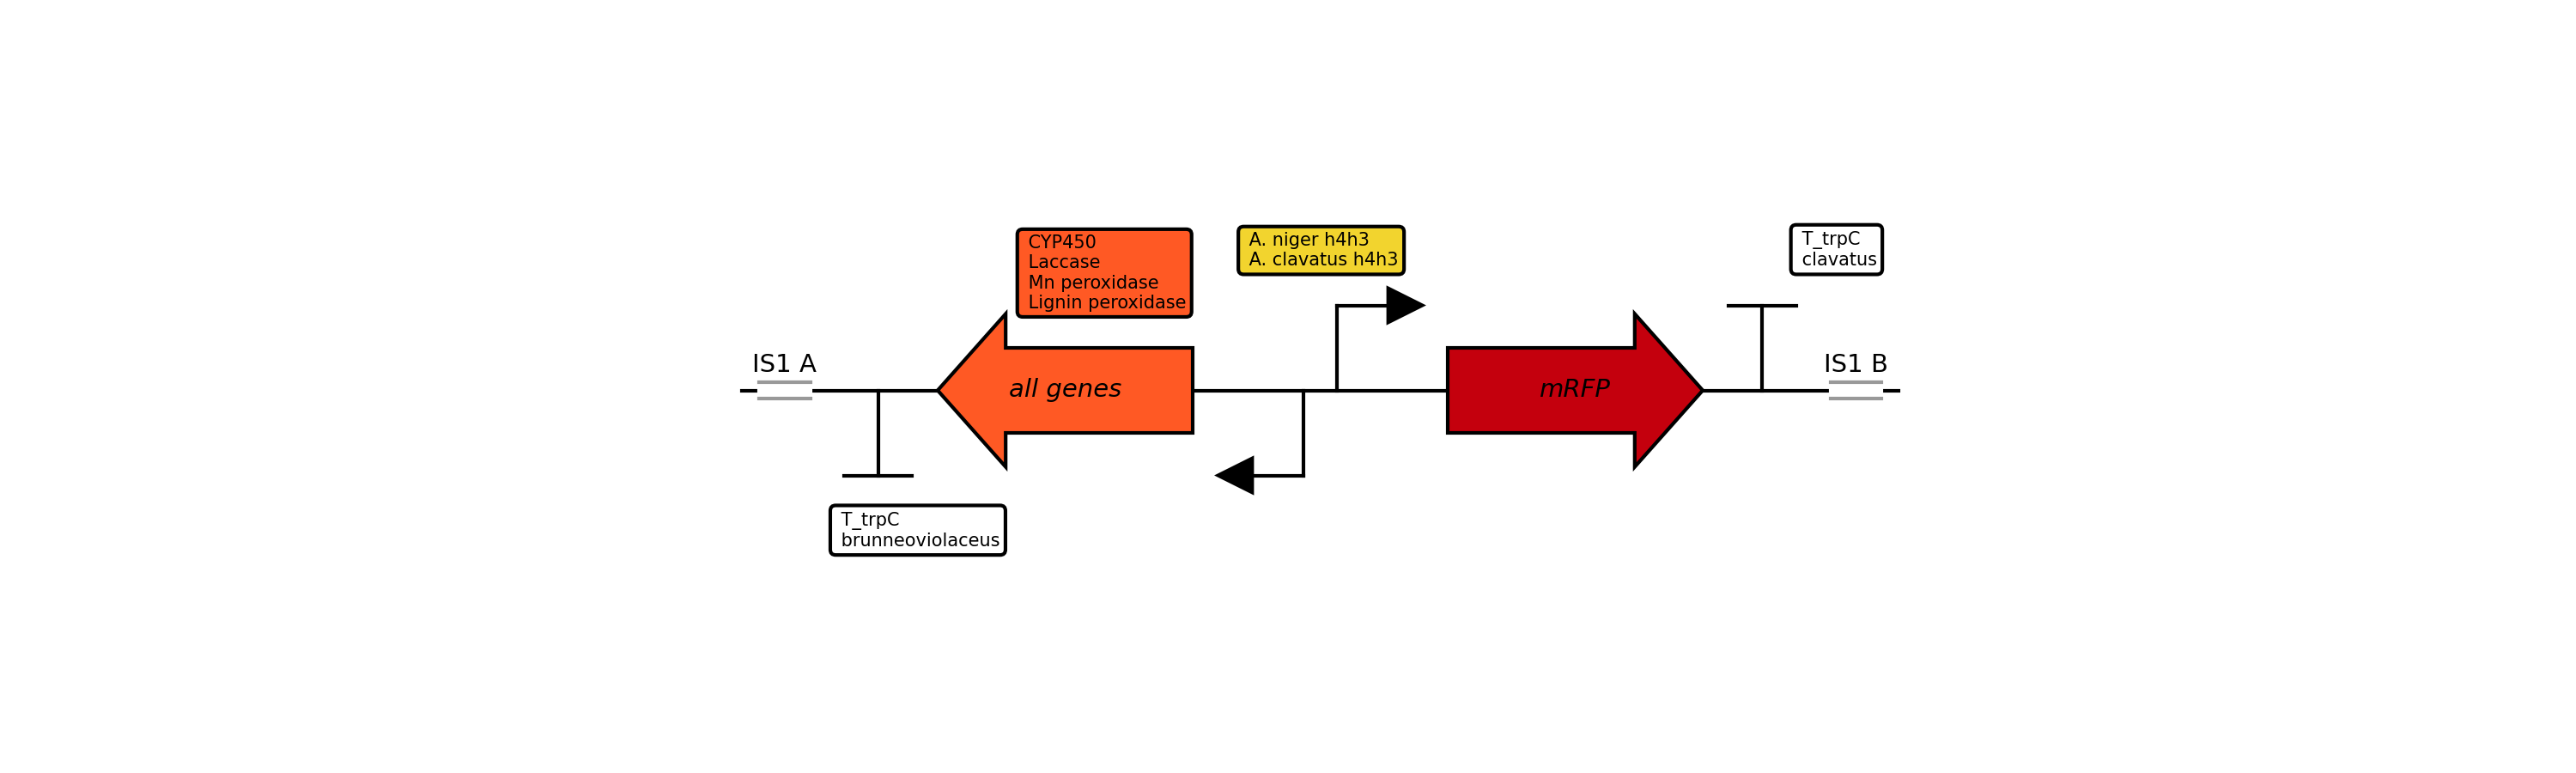

In [13]:
plt.figure(figsize=(10, 3),dpi=300)
gs = gridspec.GridSpec(1, 1)

# Plot G8H construct
ax = plt.subplot(gs[0])
dnaplotlib.plot_sbol_designs([ax], [[IS1A, t_tef1, allgenes, prv1, pfw1, mRFP, t_trpC1, IS1B]])

#### Plot text
# terminators
plt.text(11,-18, ' T_trpC \n brunneoviolaceus', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))
plt.text(124,15, ' T_trpC \n clavatus', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))

# promoters

plt.text(59, 15, ' A. niger h4h3 \n A. clavatus h4h3', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor=yellow))


# allgenes
plt.text(33,10, ' CYP450 \n Laccase \n Mn peroxidase \n Lignin peroxidase', ha='left', rotation=0, wrap=True,  size = 5, 
        # adds box
        bbox=dict(boxstyle="round",facecolor=orange))

name = 'Genetic construct w dnaplotlib mRFP'
#plt.savefig('G8H_CPR_library/Data/Plots_for_publication/'+name+'.pdf',format = 'pdf',  dpi = 300)
plt.savefig('data/plots/'+name+'.png',format = 'png',  dpi = 300)
plt.savefig('data/plots/'+name+'.pdf',format = 'pdf',  dpi = 300)

IPython.core.display.Image('data/plots/Genetic construct w dnaplotlib mRFP.png', width=2000)

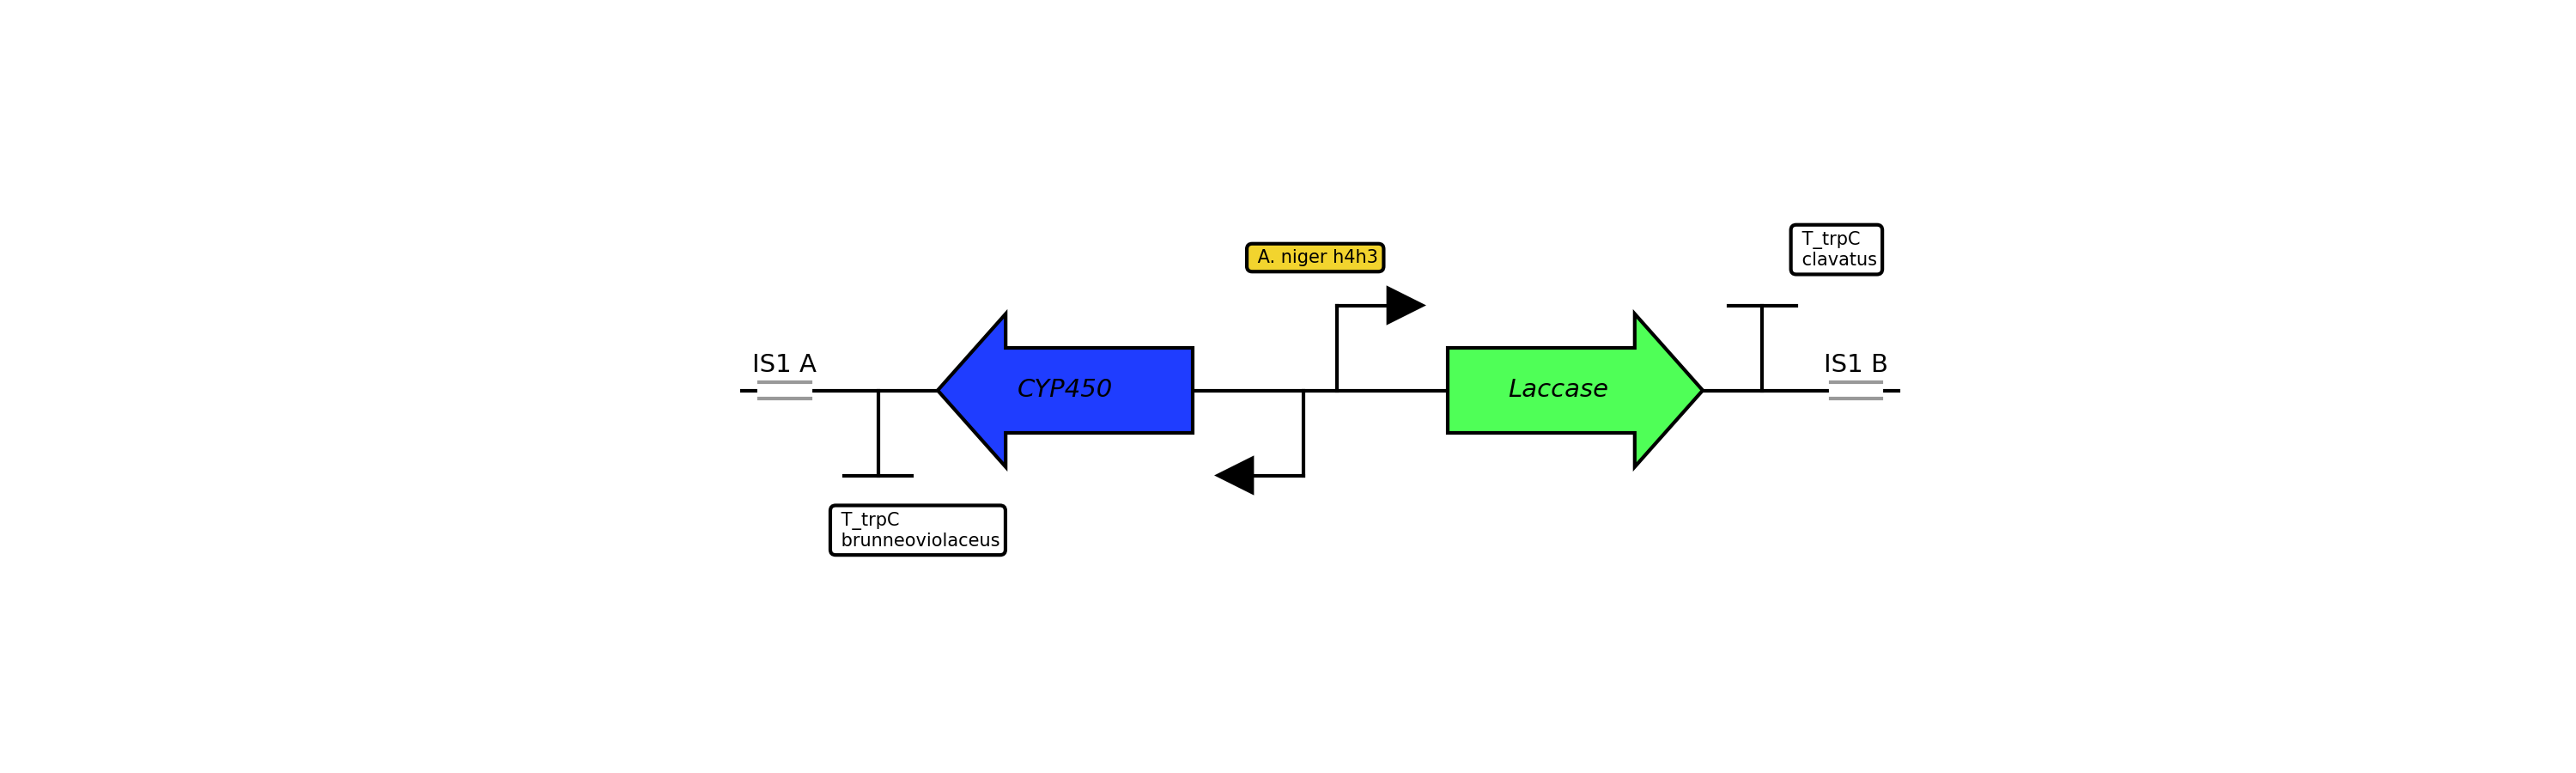

In [14]:
plt.figure(figsize=(10, 3),dpi=300)
gs = gridspec.GridSpec(1, 1)

# Plot G8H construct
ax = plt.subplot(gs[0])
dnaplotlib.plot_sbol_designs([ax], [[IS1A, t_tef2, CYP, prv2, pfw2,  Lac, t_trpC2, IS1B]])

#### Plot text
# terminators
plt.text(11,-18, ' T_trpC \n brunneoviolaceus', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))
plt.text(124,15, ' T_trpC \n clavatus', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))

# promoters
plt.text(60, 15, ' A. niger h4h3', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor=yellow))

name = 'Genetic construct w dnaplotlib IS1'
#plt.savefig('G8H_CPR_library/Data/Plots_for_publication/'+name+'.pdf',format = 'pdf',  dpi = 300)
plt.savefig('data/plots/'+name+'.png',format = 'png',  dpi = 300)
plt.savefig('data/plots/'+name+'.pdf',format = 'pdf',  dpi = 300)

IPython.core.display.Image('data/plots/Genetic construct w dnaplotlib IS1.png', width=2000)

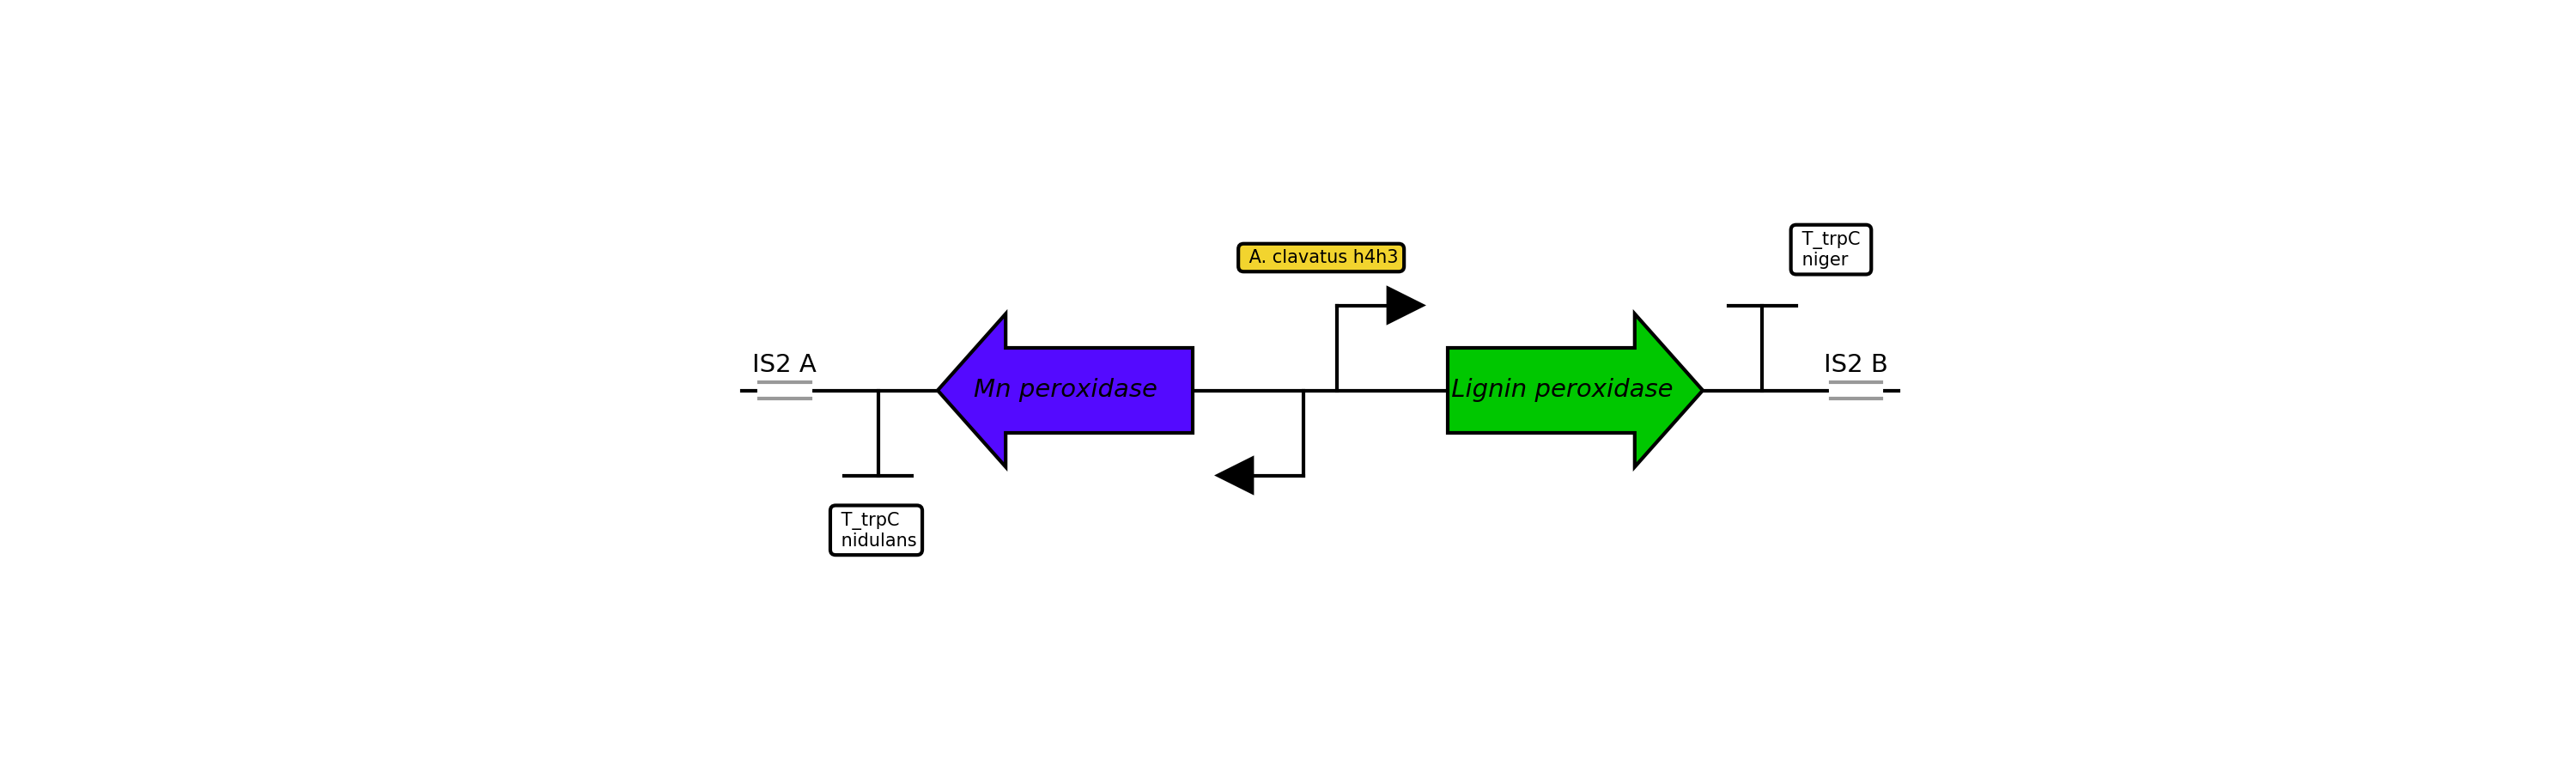

In [15]:
plt.figure(figsize=(10, 3),dpi=300)
gs = gridspec.GridSpec(1, 1)

# Plot G8H construct
ax = plt.subplot(gs[0])
dnaplotlib.plot_sbol_designs([ax], [[IS2A, t_tef3, MnO, prv3, pfw3,  LiO, t_trpC3, IS2B]])

#### Plot text
# terminators
plt.text(11,-18, ' T_trpC \n nidulans', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))
plt.text(124,15, ' T_trpC \n niger', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))

# promoters

plt.text(59, 15, ' A. clavatus h4h3', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor=yellow))

name = 'Genetic construct w dnaplotlib IS2'
#plt.savefig('G8H_CPR_library/Data/Plots_for_publication/'+name+'.pdf',format = 'pdf',  dpi = 300)
plt.savefig('data/plots/'+name+'.png',format = 'png',  dpi = 300)
plt.savefig('data/plots/'+name+'.pdf',format = 'pdf',  dpi = 300)

IPython.core.display.Image('data/plots/Genetic construct w dnaplotlib IS2.png', width=2000)

In [16]:
# list_of_seqs = [UP_sites_seqrecord, G8H_templates_seqrecord, pG8H_templates_seqrecord, pCPR_templates_seqrecord, G8H_CPR_templates_seqrecord, marker_templates_seqrecord, DW_sites_seqrecord]

# list_of_names = [UP_sites_names,G8H_templates_names, pG8H_templates_names, pG8H_CPR_templates_names,G8H_CPR_templates_names, marker_templates_names, DW_sites_names]

# # Check that the lists are the same lenght
# if len(list_of_seqs) != len(list_of_names): 
#     print('!!!!!!!!!!!!!!!!!The lengths are not the same, check the sequences!!!!!!!!!!!!!!!!!!')
# else: 
#     print('The lengths are the same')

Now it's a good idea at this point to make sure that all the objects have been made into Dseqrecords and that they have the right size and configuration.  

In [71]:
# list_of_names

### Things to look out for when running DesignAssembly. 

1. if the melting temperature is set too low it will make a warning saying that PCR_prod is not unique. It helps to raise the melting temperature if that happens so it can make longer and unique primers 

# 2. Generating the combinatorial library 

### Initiating the DesignAssembly class:

Before we initiate the designAssembly object we can define and add a piece of DNA that can be used for easier genotyping and contain a crRNA so we can delete the genetic module if we need to. Below, a pad consisting of a ATF1 CRISPR Guide RNA flanked by arbitrary sequences is inititalized as a pad  

In [148]:
# ATF1_CRISPR_Guide_RNA = 'CTATGCTGTCGGATGAGTCC'   = dummy seq : GTATAGGACGCTATGCTGTCGGATGAGTCCCGTAGAATGA
pad_ATF1_CRISPR_Guide_RNA = [Dseqrecord('')] # we could integrate multiple pads it 
pad_ATF1_CRISPR_Guide_RNA[0].seq

Dseq(-0)


We simply initiate the class by calling it with the list of sequences, their names, the pad, and the position of the pad. 
This normally takes about 20 sec. 

In [149]:
from teemi.design.combinatorial_design import DesignAssembly

In [156]:

list_of_seqs_IS1 = [[ISs_arms_seqrecord[0]], CYP_templates_seqrecord, [ph4h3_templates_seqrecord[1]], Lac_templates_seqrecord, [ISs_arms_seqrecord[1]]]
IS1_assembly = DesignAssembly(list_of_seqs_IS1,    
                                list_of_pads= pad_ATF1_CRISPR_Guide_RNA,  # The sequence you want to incorporate into the primers. 
                                positions_of_pads =  [3],  # Position of the pad in the sequence
                                target_tm=55,          # Target TM
                                limit=13,              # Minimum length of the primers
                                overlap=50)            # Overlap between primers

list_of_seqs_IS2 = [[ISs_arms_seqrecord[2]], MnO_templates_seqrecord, [ph4h3_templates_seqrecord[0]], LiO_templates_seqrecord, [ISs_arms_seqrecord[3]]]
IS2_assembly = DesignAssembly(list_of_seqs_IS2,    
                                list_of_pads= pad_ATF1_CRISPR_Guide_RNA,  # The sequence you want to incorporate into the primers. 
                                positions_of_pads =  [3],  # Position of the pad in the sequence
                                target_tm=55,          # Target TM
                                limit=13,              # Minimum length of the primers
                                overlap=50)            # Overlap between primers

The DesignAssembly class have class methods attached to it. These include displaying primers, the PCRs that needs to made and a graphical representation of the construts. 

The methods are as follows: 

- show_contigs
- show_variants_lib_df
- primer_list
- primer_list_to_dataframe
- pcr_list_to_dataframe

Here it is shown how a dataframe with all the variants are generated:

In [158]:
combinatorial_lib_variants_IS1_df = IS1_assembly.show_variants_lib_df()
combinatorial_lib_variants_IS1_df

combinatorial_lib_variants_IS2_df = IS2_assembly.show_variants_lib_df()
combinatorial_lib_variants_IS2_df


,0,1,2,3,4,Systematic_name,Variant
0,is2_A_TtrpC_nidulans,Manganese_peroxidase_(m,A._clavatus_h4h3,Lignin_peroxidase_(LPG1,is2_B_TtrpC_niger,"(1, 1, 1, 1, 1)",0


We can change the coloumn names to get a better overview. 


In [159]:
combinatorial_lib_variants_IS1_df = combinatorial_lib_variants_IS1_df.rename(columns={0: 'A_site',1: 'CYP450', 2: 'Promoter', 3:'Laccase', 4:'CPR', 5:'B_site'})
combinatorial_lib_variants_IS1_df

,A_site,CYP450,Promoter,Laccase,CPR,Systematic_name,Variant
0,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._niger_h4h3,AF414109,is1_B_TtrpC_clavatus,"(1, 1, 1, 1, 1)",0
1,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._niger_h4h3,Laccase_Trametes_versic,is1_B_TtrpC_clavatus,"(1, 1, 1, 2, 1)",1
2,is1_A_TtrpC_brunneo,Cyp450s-PC-PAH_3,A._niger_h4h3,AF414109,is1_B_TtrpC_clavatus,"(1, 2, 1, 1, 1)",2
3,is1_A_TtrpC_brunneo,Cyp450s-PC-PAH_3,A._niger_h4h3,Laccase_Trametes_versic,is1_B_TtrpC_clavatus,"(1, 2, 1, 2, 1)",3


Lets see how the first assembly overlaps. We can do that with the following code: 

In [153]:
# the first variant is chosen here
subset_of_the_assemblies = IS1_assembly.list_of_assemblies[0]
assemble = Assembly(subset_of_the_assemblies, limit = 30)
print(assemble.assemble_linear()[0].figure())

is1_A_TtrpC_brunneo|50
                    \/
                    /\
                    50|Cyp450-PC-PAH_1|50
                                       \/
                                       /\
                                       50|A._niger_h4h3|50
                                                        \/
                                                        /\
                                                        50|AF414109|50
                                                                    \/
                                                                    /\
                                                                    50|is1_B_TtrpC_clavatus


How long is the contig?

In [154]:
assemble.assemble_linear()

[Contig(-7157)]

We can retrieve the primers needed for the assembly in the following way:

In [161]:
IS1_primer_df = IS1_assembly.primer_list_to_dataframe()
IS1_primer_df

,id,anneals to,sequence,annealing temperature,length,price(DKK),description,footprint,len_footprint
0,P001,is1_A_TtrpC_brunneo,"(C, C, C, C, C, G, T, G, T, C, A, A, A)",55.28,13,23.4,Anneals to is1_A_TtrpC_brunneo,"(C, C, C, C, C, G, T, G, T, C, A, A, A)",13
1,P002,is1_A_TtrpC_brunneo,"(T, A, G, A, A, A, G, C, G, G, C, A, G, A, G, ...",56.24,43,77.4,"Anneals to is1_A_TtrpC_brunneo, overlaps to so...","(G, G, A, T, C, C, T, A, C, A, A, A, T, G, T, ...",18
2,P003,Cyp450-PC-PAH_1,"(C, G, T, C, T, C, A, A, C, G, A, C, A, T, T, ...",54.84,40,72.0,"Anneals to Cyp450-PC-PAH_1, overlaps to is1_A_...","(A, C, C, A, A, C, A, T, G, G, C, T, C, T, G)",15
3,P004,Cyp450-PC-PAH_1,"(G, T, T, T, A, C, T, T, T, A, T, A, G, A, C, ...",55.24,41,73.8,"Anneals to Cyp450-PC-PAH_1, overlaps to 878bp_...","(T, C, A, C, A, C, T, G, G, A, A, C, A, A, C, C)",16
4,P005,A._niger_h4h3,"(G, C, C, G, C, T, G, C, G, G, G, T, T, G, T, ...",54.18,45,81.0,"Anneals to A._niger_h4h3, overlaps to Cyp450-P...","(T, G, T, G, A, A, G, G, T, T, G, T, C, T, A, ...",20
5,P006,A._niger_h4h3,"(C, G, A, A, A, A, G, A, G, A, G, T, G, A, A, ...",53.61,46,82.8,"Anneals to A._niger_h4h3, overlaps to lac1_CDS...","(C, T, T, A, G, T, G, G, A, T, T, A, A, G, T, ...",21
6,P007,AF414109,"(A, A, T, C, C, A, T, C, A, A, A, C, T, T, A, ...",54.47,42,75.6,"Anneals to AF414109, overlaps to A._niger_h4h3","(A, T, G, T, C, G, A, G, G, T, T, T, C, A, C, ...",17
7,P008,AF414109,"(G, A, T, G, T, C, G, A, A, A, A, C, G, T, T, ...",53.38,39,70.2,"Anneals to AF414109, overlaps to 1623bp_PCR_prod","(T, T, A, C, T, G, G, T, C, G, C, T, C, G)",14
8,P009,is1_B_TtrpC_clavatus,"(C, G, C, G, C, G, C, G, A, C, C, C, G, A, G, ...",57.04,39,70.2,"Anneals to is1_B_TtrpC_clavatus, overlaps to A...","(G, G, A, C, C, C, T, A, C, C, A, A, C, G)",14
9,P010,is1_B_TtrpC_clavatus,"(G, C, T, G, A, G, G, A, C, T, T, A, A, T, A, ...",56.86,23,41.4,Anneals to is1_B_TtrpC_clavatus,"(G, C, T, G, A, G, G, A, C, T, T, A, A, T, A, ...",23


In [162]:
IS2_primer_df = IS2_assembly.primer_list_to_dataframe()
IS2_primer_df

,id,anneals to,sequence,annealing temperature,length,price(DKK),description,footprint,len_footprint
0,P001,is2_A_TtrpC_nidulans,"(A, T, T, A, C, G, T, A, G, A, G, A, G, A, G, ...",54.53,18,32.4,Anneals to is2_A_TtrpC_nidulans,"(A, T, T, A, C, G, T, A, G, A, G, A, G, A, G, ...",18
1,P002,is2_A_TtrpC_nidulans,"(G, G, G, A, A, G, A, G, C, G, C, T, A, G, C, ...",55.23,43,77.4,"Anneals to is2_A_TtrpC_nidulans, overlaps to s...","(G, G, A, T, C, C, A, C, T, T, A, A, C, G, T, ...",18
2,P003,Manganese_peroxidase_(m,"(G, A, T, T, T, C, A, G, T, A, A, C, G, T, T, ...",55.23,41,73.8,"Anneals to Manganese_peroxidase_(m, overlaps t...","(G, T, A, C, A, G, T, C, G, A, G, C, T, A, G, C)",16
3,P004,Manganese_peroxidase_(m,"(C, C, T, T, T, T, T, T, A, A, T, T, C, A, C, ...",54.42,42,75.6,"Anneals to Manganese_peroxidase_(m, overlaps t...","(G, C, T, C, A, A, G, A, T, C, A, A, C, G, T, ...",17
4,P005,A._clavatus_h4h3,"(G, N, T, C, C, C, G, G, T, G, A, C, G, T, T, ...",55.29,50,90.0,"Anneals to A._clavatus_h4h3, overlaps to Manga...","(T, T, T, G, A, T, A, G, A, T, G, T, G, A, A, ...",25
5,P006,A._clavatus_h4h3,"(A, T, C, G, A, G, T, C, A, T, T, G, G, G, G, ...",56.31,47,84.6,"Anneals to A._clavatus_h4h3, overlaps to source","(T, T, T, T, G, A, T, G, A, T, T, A, G, G, T, ...",22
6,P007,Lignin_peroxidase_(LPG1,"(A, A, T, C, C, A, T, C, A, A, A, C, C, T, A, ...",60.70,38,68.4,"Anneals to Lignin_peroxidase_(LPG1, overlaps t...","(G, C, C, T, G, C, T, G, A, C, C, C, C)",13
7,P008,Lignin_peroxidase_(LPG1,"(A, A, T, G, C, C, A, G, C, A, A, C, A, T, T, ...",61.11,45,81.0,"Anneals to Lignin_peroxidase_(LPG1, overlaps t...","(G, T, A, C, T, C, A, A, T, C, G, C, T, G, G, ...",20
8,P009,is2_B_TtrpC_niger,"(C, A, C, A, T, C, T, T, T, G, C, C, A, G, C, ...",54.35,41,73.8,"Anneals to is2_B_TtrpC_niger, overlaps to Lign...","(A, G, A, T, C, C, C, A, C, C, A, A, T, G, T, T)",16
9,P010,is2_B_TtrpC_niger,"(T, C, T, G, A, G, A, A, A, A, A, G, A, T, G, ...",56.14,18,32.4,Anneals to is2_B_TtrpC_niger,"(T, C, T, G, A, G, A, A, A, A, A, G, A, T, G, ...",18


In [147]:
IS1_primer_df.sequence[1]

Seq('TAGAAAGCGGCAGAGCCATGTTGGTGGATCCTACAAATGTCGT')

In [134]:
Total_bases = IS1_primer_df['length'].sum()
Total_bases

578

In [164]:
Total_price = IS1_primer_df['price(DKK)'].sum()
print(f"The total price of the primers for the IS1 library is: {Total_price:.0f}")

The total price of the primers for the IS1 library is: 1069


In [165]:
Total_price = IS2_primer_df['price(DKK)'].sum()
print(f"The total price of the primers for the IS2 library is: {Total_price:.0f}")

The total price of the primers for the IS2 library is: 689


In [ ]:
Total_price = IS1_primer_df['price(DKK)'].sum()
print(f"The total price of the primers for the library is: {Total_price:.0f}")

The total price of the primers for the library is: 1040


In [128]:
larger_than_60 = IS1_primer_df[IS1_primer_df.length > 60]
len(larger_than_60)

1

If we want to take a closer look at the PCRs needed to complete the library do the following: 

In [166]:
IS1_pcr_df = IS1_assembly.pcr_list_to_dataframe()
IS1_pcr_df

,pcr_number,template,forward_primer,reverse_primer,f_tm,r_tm
0,PCR1,is1_A_TtrpC_brunneo,P001,P002,55.28,56.24
1,PCR2,Cyp450-PC-PAH_1,P003,P004,54.84,55.24
2,PCR3,A._niger_h4h3,P005,P006,54.18,53.61
3,PCR4,AF414109,P007,P008,54.47,53.38
4,PCR5,is1_B_TtrpC_clavatus,P009,P010,57.04,56.86
5,PCR6,A._niger_h4h3,P005,P011,54.18,53.61
6,PCR7,Laccase_Trametes_versic,P007,P008,54.47,53.38
7,PCR8,is1_A_TtrpC_brunneo,P001,P012,55.28,56.24
8,PCR9,Cyp450s-PC-PAH_3,P013,P014,55.24,55.36
9,PCR10,A._niger_h4h3,P015,P006,54.18,53.61


In [167]:
IS2_pcr_df = IS2_assembly.pcr_list_to_dataframe()
IS2_pcr_df

,pcr_number,template,forward_primer,reverse_primer,f_tm,r_tm
0,PCR1,is2_A_TtrpC_nidulans,P001,P002,54.53,55.23
1,PCR2,Manganese_peroxidase_(m,P003,P004,55.23,54.42
2,PCR3,A._clavatus_h4h3,P005,P006,55.29,56.31
3,PCR4,Lignin_peroxidase_(LPG1,P007,P008,60.70,61.11
4,PCR5,is2_B_TtrpC_niger,P009,P010,54.35,56.14


With this information it is possible to: 
1. Order the primers
2. Go into the lab and make the PCRs.